<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [111]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 189.5 MB/s eta 0:00:00


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [108]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [7]:
## Write your code here
print(df.columns.values)
print(df.dtypes)
print(df.describe(include='all'))

['ResponseId' 'MainBranch' 'Age' 'Employment' 'RemoteWork' 'Check'
 'CodingActivities' 'EdLevel' 'LearnCode' 'LearnCodeOnline' 'TechDoc'
 'YearsCode' 'YearsCodePro' 'DevType' 'OrgSize' 'PurchaseInfluence'
 'BuyNewTool' 'BuildvsBuy' 'TechEndorse' 'Country' 'Currency' 'CompTotal'
 'LanguageHaveWorkedWith' 'LanguageWantToWorkWith' 'LanguageAdmired'
 'DatabaseHaveWorkedWith' 'DatabaseWantToWorkWith' 'DatabaseAdmired'
 'PlatformHaveWorkedWith' 'PlatformWantToWorkWith' 'PlatformAdmired'
 'WebframeHaveWorkedWith' 'WebframeWantToWorkWith' 'WebframeAdmired'
 'EmbeddedHaveWorkedWith' 'EmbeddedWantToWorkWith' 'EmbeddedAdmired'
 'MiscTechHaveWorkedWith' 'MiscTechWantToWorkWith' 'MiscTechAdmired'
 'ToolsTechHaveWorkedWith' 'ToolsTechWantToWorkWith' 'ToolsTechAdmired'
 'NEWCollabToolsHaveWorkedWith' 'NEWCollabToolsWantToWorkWith'
 'NEWCollabToolsAdmired' 'OpSysPersonal use' 'OpSysProfessional use'
 'OfficeStackAsyncHaveWorkedWith' 'OfficeStackAsyncWantToWorkWith'
 'OfficeStackAsyncAdmired' 'OfficeSt

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [8]:
## Write your code here
df.replace('?', np.nan, inplace=True)
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())

averageComp = df['ConvertedCompYearly'].mean(axis=0)
df['ConvertedCompYearly'].replace(np.nan, averageComp, inplace=True)

commonRemoteWork = df['RemoteWork'].value_counts().idxmax()
df['RemoteWork'].replace(np.nan, commonRemoteWork, inplace=True)

missing_data = df.isnull()

print(missing_data['ConvertedCompYearly'].value_counts())
print(missing_data['RemoteWork'].value_counts())

ResponseId
False    65437
Name: count, dtype: int64
MainBranch
False    65437
Name: count, dtype: int64
Age
False    65437
Name: count, dtype: int64
Employment
False    65437
Name: count, dtype: int64
RemoteWork
False    54806
True     10631
Name: count, dtype: int64
Check
False    65437
Name: count, dtype: int64
CodingActivities
False    54466
True     10971
Name: count, dtype: int64
EdLevel
False    60784
True      4653
Name: count, dtype: int64
LearnCode
False    60488
True      4949
Name: count, dtype: int64
LearnCodeOnline
False    49237
True     16200
Name: count, dtype: int64
TechDoc
False    40897
True     24540
Name: count, dtype: int64
YearsCode
False    59869
True      5568
Name: count, dtype: int64
YearsCodePro
False    51610
True     13827
Name: count, dtype: int64
DevType
False    59445
True      5992
Name: count, dtype: int64
OrgSize
False    47480
True     17957
Name: count, dtype: int64
PurchaseInfluence
False    47406
True     18031
Name: count, dtype: int64
BuyNewToo

/tmp/ipykernel_301/2538175688.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].replace(np.nan, averageComp, inplace=True)
/tmp/ipykernel_301/2538175688.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

ConvertedCompYearly
False    65437
Name: count, dtype: int64
RemoteWork
False    65437
Name: count, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [9]:
## Write your code here
print(df['Employment'].value_counts())
print(df['JobSat'].value_counts())
print(df['YearsCodePro'].value_counts())

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


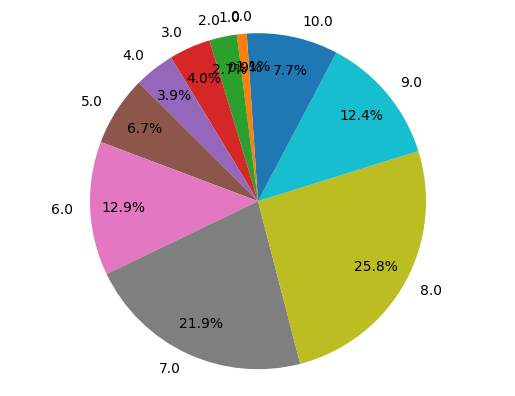

In [26]:
## Write your code here
jobSat = df.groupby('JobSat')['ResponseId'].count()
plt.pie(jobSat, labels = jobSat.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8)
plt.axis("equal")
plt.show()

In [27]:
# Most people are relatively happy with their job. 7 and 8 represented almost half of all scores. 20% were 9 and 10. Only a quarter was 6 and below.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


<Figure size 1200x1200 with 0 Axes>

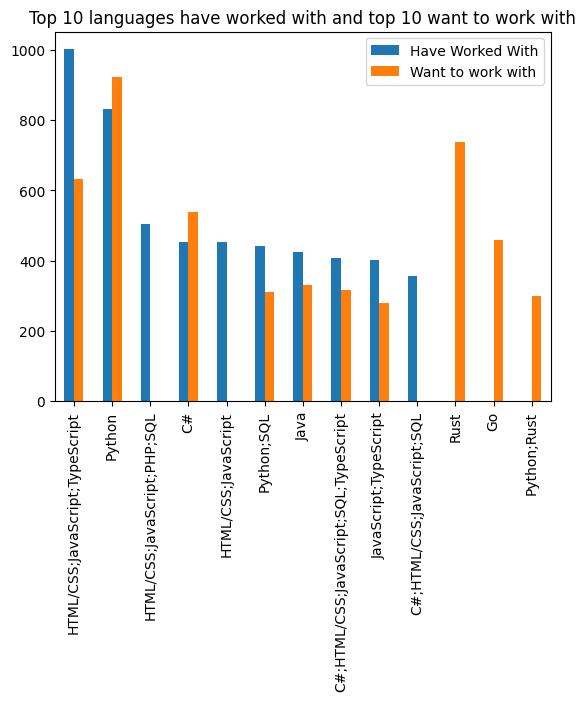

In [55]:
## Write your code here
groupedLanguageHave = df.groupby('LanguageHaveWorkedWith')['ResponseId'].count().sort_values(ascending=False).head(10).to_frame()
groupedLanguageWant = df.groupby('LanguageWantToWorkWith')['ResponseId'].count().sort_values(ascending=False).head(10).to_frame()
both = pd.concat([groupedLanguageHave, groupedLanguageWant], axis=1)
plt.figure(figsize=(12,12))
both.plot(kind='bar')
plt.legend(['Have Worked With', 'Want to work with'])
plt.title("Top 10 languages have worked with and top 10 want to work with")
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Axes: xlabel='RemoteWork', ylabel='Country'>

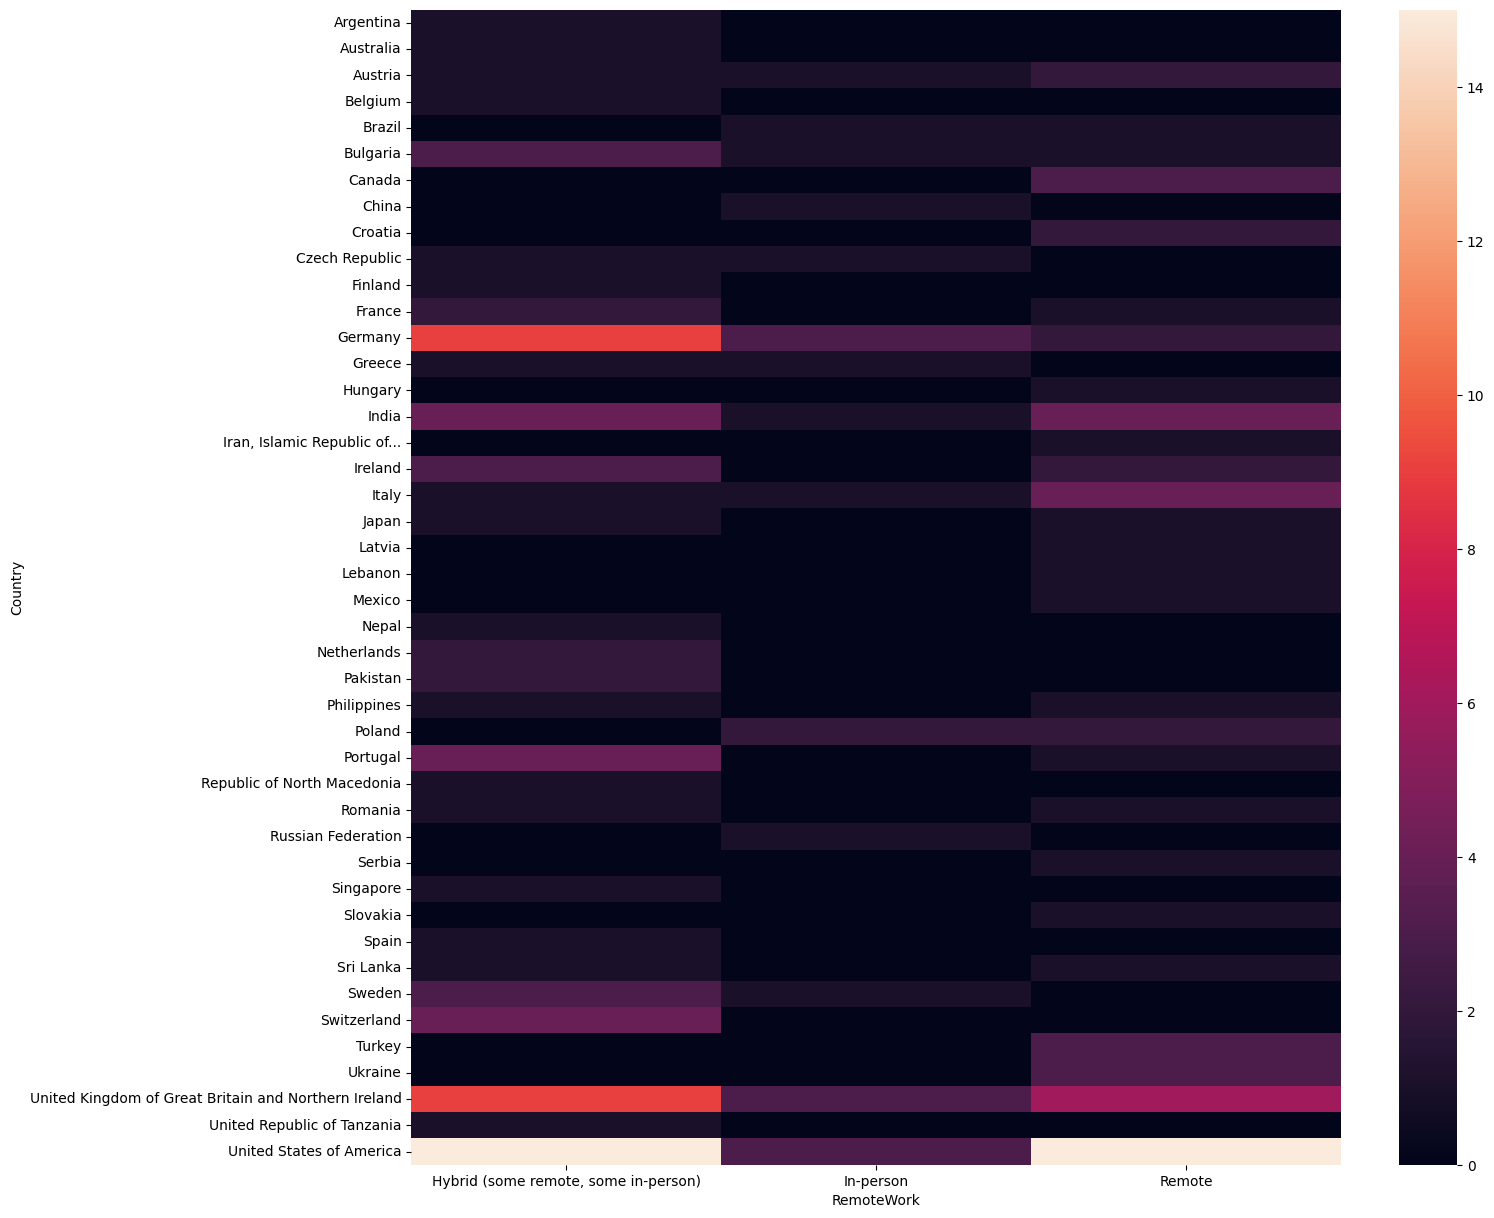

In [98]:
## Write your code here
plt.figure(figsize=(15,15))
data = df[['Country','RemoteWork']].head(200)
crosstab = pd.crosstab(data['Country'], data['RemoteWork'])
sns.heatmap(crosstab)

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


/tmp/ipykernel_301/1546529547.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].replace('Less than 1 year', 1, inplace=True)
/tmp/ipykernel_301/1546529547.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

,YearsCodePro,JobSat
YearsCodePro,1.000000,0.104181
JobSat,0.104181,1.000000


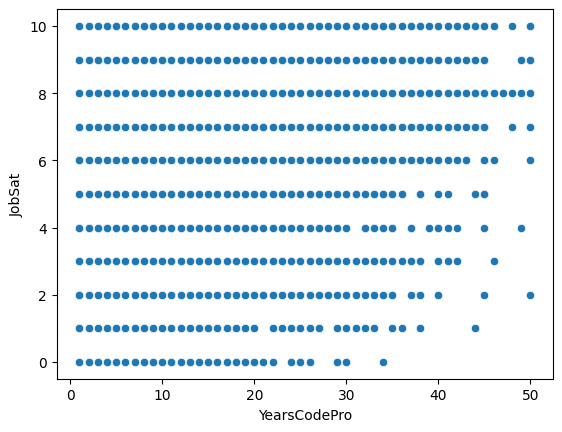

In [128]:
## Write your code here
df.dropna(subset='YearsCodePro', axis=0, inplace=True)
df['YearsCodePro'].replace('Less than 1 year', 1, inplace=True)
df['YearsCodePro'].replace('More than 50 years', 50, inplace=True)
df['YearsCodePro'] = df['YearsCodePro'].astype(int)
sns.scatterplot(x='YearsCodePro',y='JobSat', data=df)

df[['YearsCodePro','JobSat']].corr()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


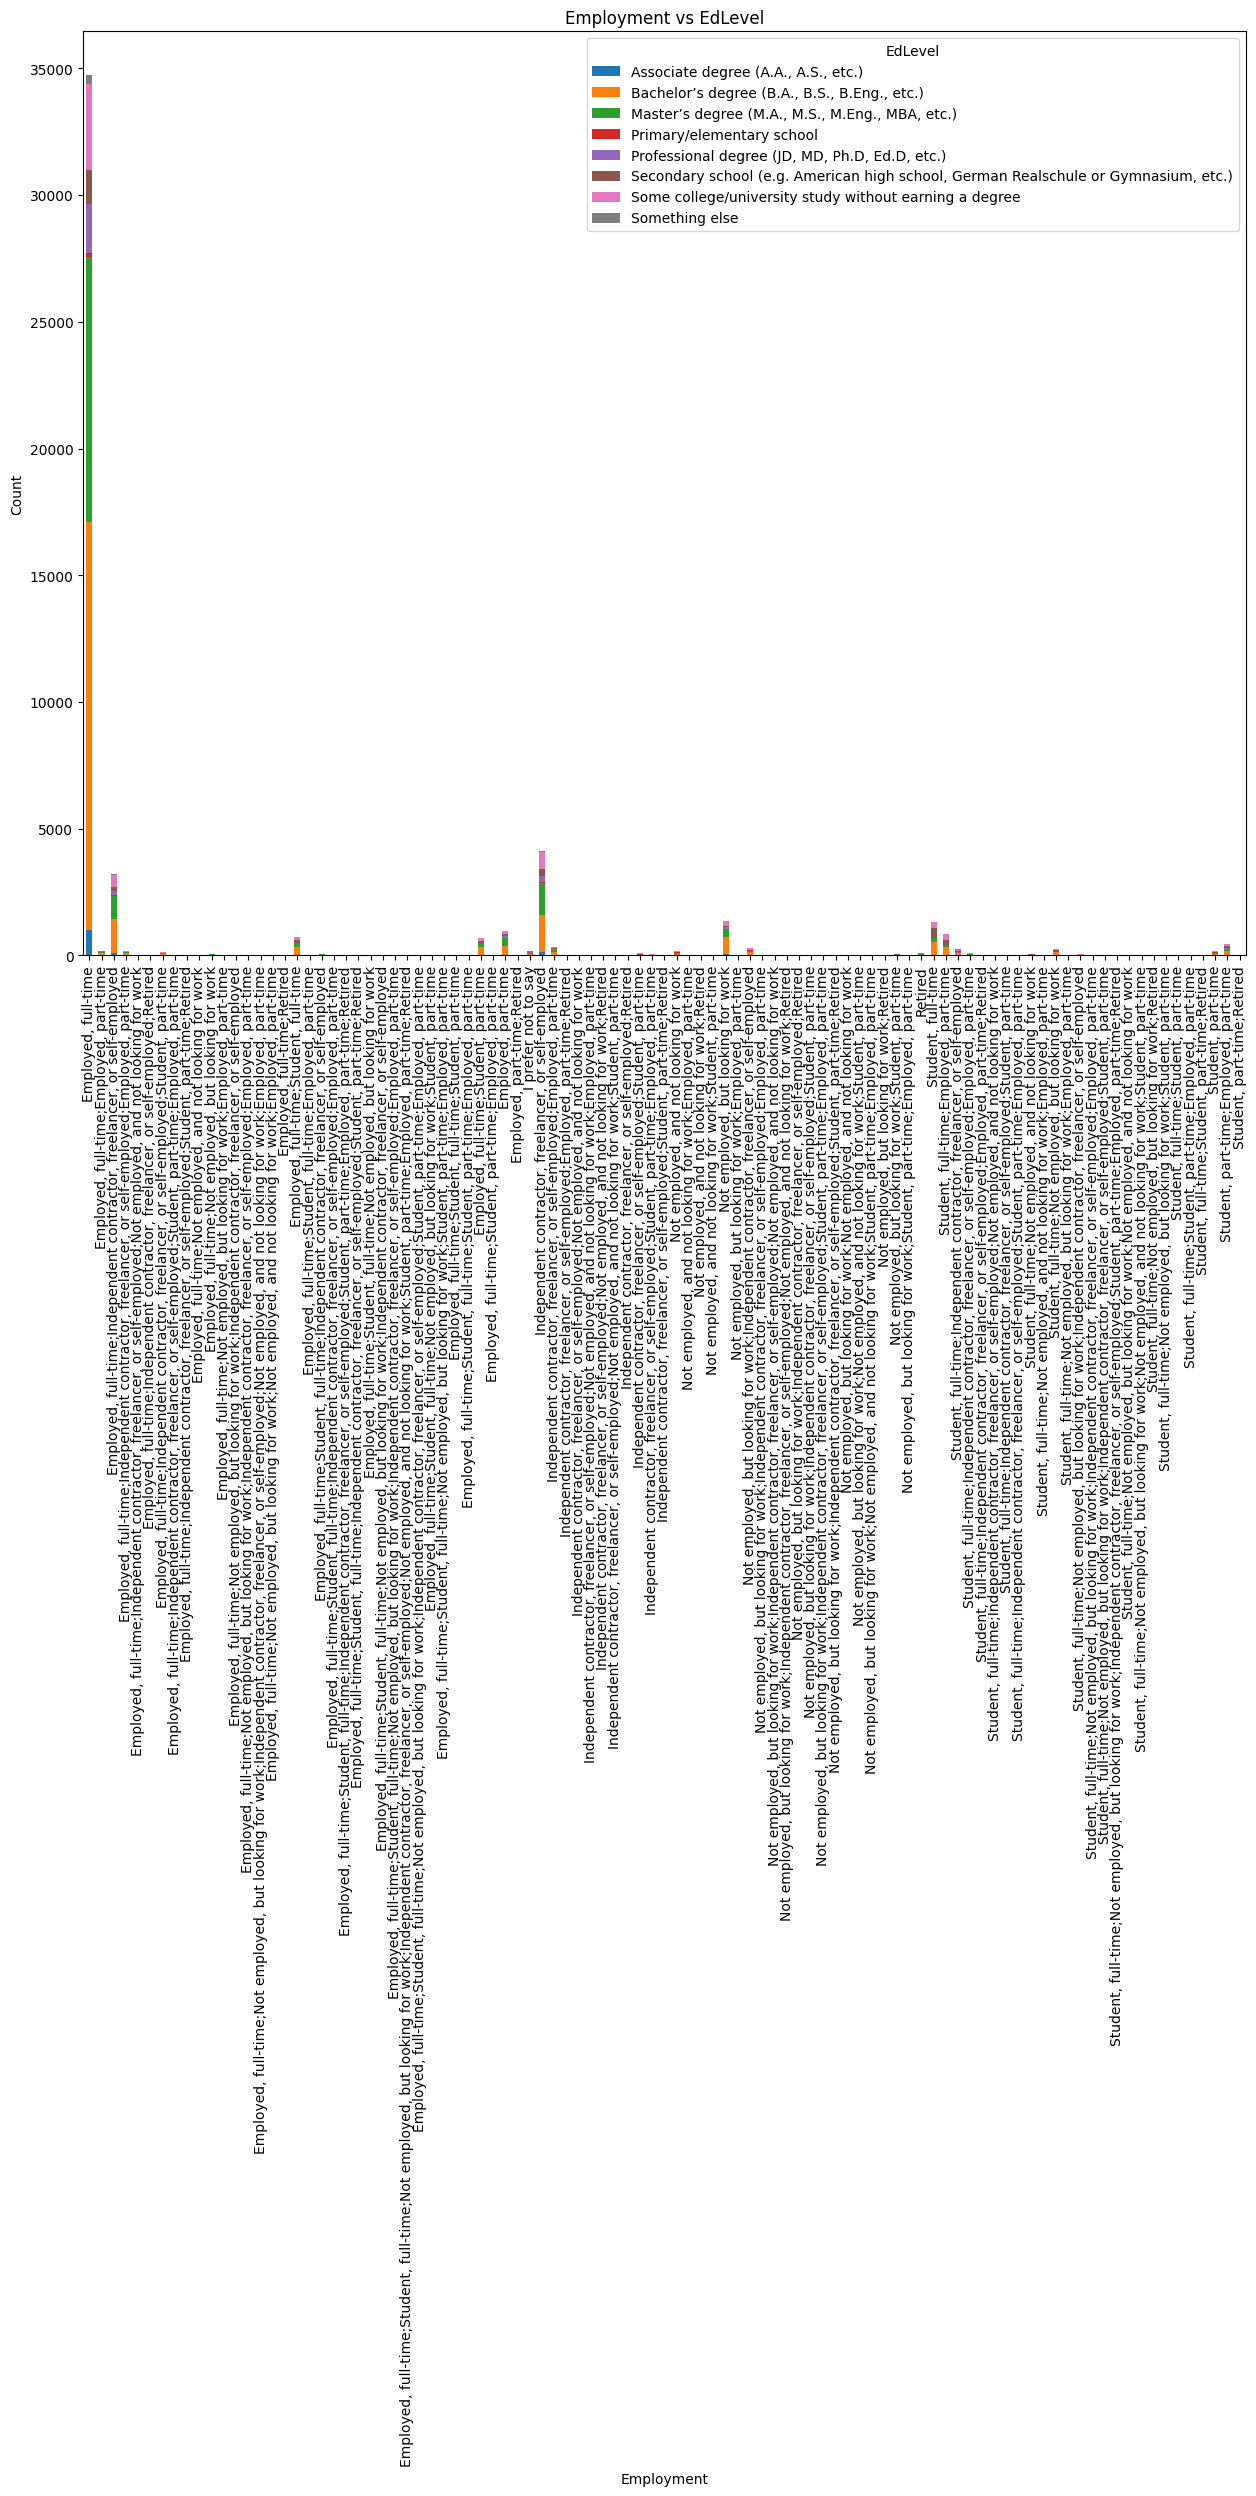

In [126]:
## Write your code here
crosstab = pd.crosstab(df['Employment'], df['EdLevel'])

crosstab.plot(kind='bar', stacked=True, figsize=(15,12))
plt.title("Employment vs EdLevel")
plt.xlabel("Employment")
plt.ylabel("Count")
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [127]:
## Write your code here
df.to_csv("Analysing_data_distribution")

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
